In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# Data Analysis

In [2]:
df = pd.read_csv('Pokemon.csv')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [5]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

#### Not all pokemons have 2 types

In [6]:
# let's see some statistics for non-numeric features
df.describe(include=['O'])

,Name,Type 1,Type 2
count,800,800,414
unique,800,18,18
top,Bulbasaur,Water,Flying
freq,1,112,97


In [7]:
print('Type 1:')
print(df['Type 1'].value_counts())

print('\nType 2:')
print(df['Type 2'].value_counts())

print('\nGeneration:')
print(df['Generation'].value_counts())

Type 1:
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

Type 2:
Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

Generation:
1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64


In [8]:
df.duplicated().sum()

0

#### Instead of plotting each 'super power' score, I will just plot the 'Total' column

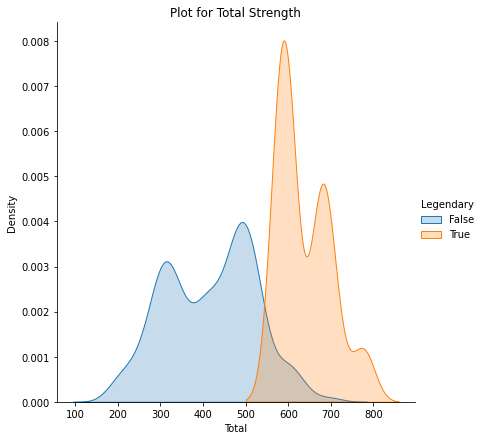

In [9]:
sns.FacetGrid(df, hue="Legendary", height=6,).map(sns.kdeplot, "Total",shade=True).add_legend()
plt.title('Plot for Total Strength')
plt.show()

Pairplot segregated on Legendariness


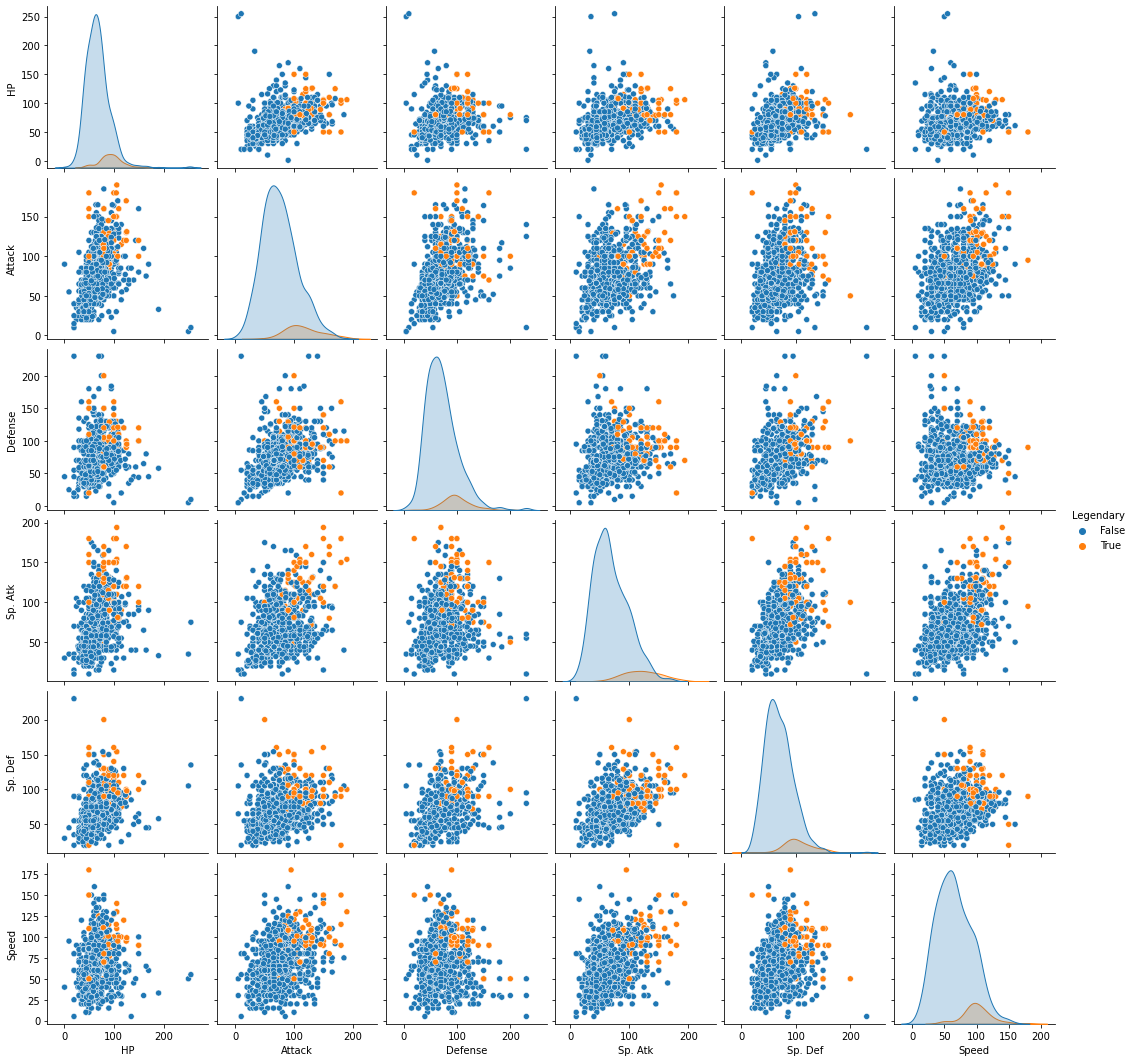

In [10]:
sns.pairplot(data=df[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Legendary']], hue='Legendary')
print('Pairplot segregated on Legendariness')
plt.show()

#### Logically, the highest the score for each feature, the most probably to be Legendary

Text(0.5, 1.0, 'Frequency of Type 1 data seperated by Legendary')

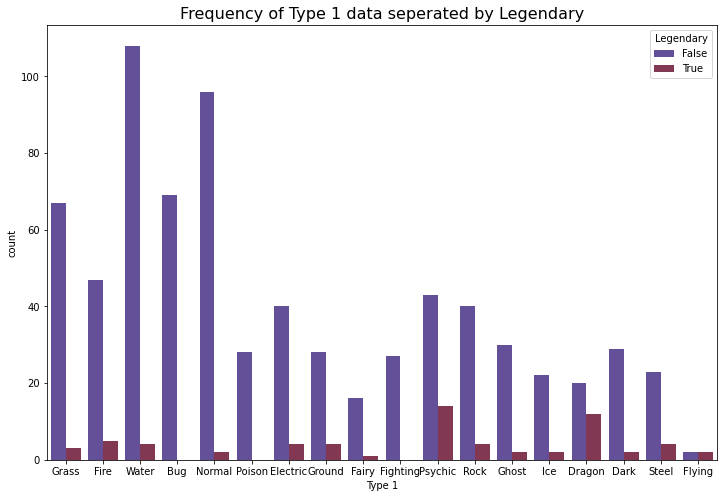

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(x = "Type 1", data = df, hue = "Legendary", palette='twilight')
plt.title("Frequency of Type 1 data seperated by Legendary", fontsize = 16)

#### As it can be seen above, from all type 1, the most legendary are 'Psychic' and 'Dragon' ones

Text(0.5, 1.0, 'Frequency of Type 2 data seperated by Legendary')

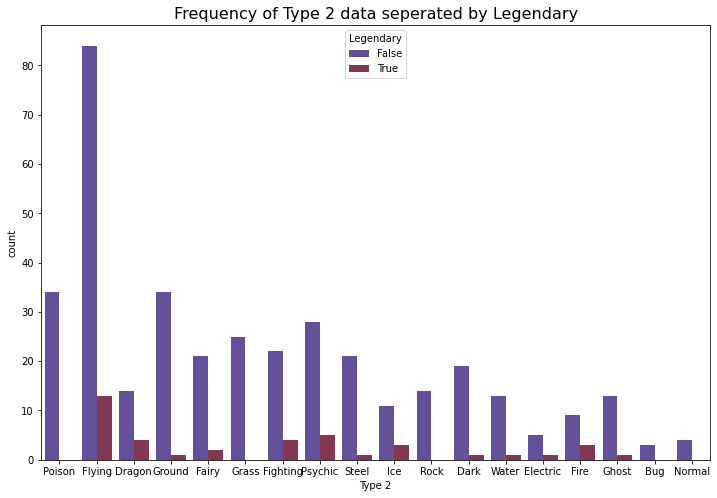

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(x = "Type 2", data = df, hue = "Legendary", palette='twilight')
plt.title("Frequency of Type 2 data seperated by Legendary", fontsize = 16)

#### Let's see how many legendary pokemons are in the dataset

In [13]:
sum(df["Legendary"]== True)

65

In [14]:
(sum(df["Legendary"]== True)/df.shape[0])*100

8.125

#### Only 8% of the pokemons are legendary

In [15]:
pd.pivot_table(df, index=["Generation"])

,#,Attack,Defense,HP,Legendary,Sp. Atk,Sp. Def,Speed,Total
Generation,,,,,,,,,
1,75.819277,76.638554,70.861446,65.819277,0.036145,71.819277,69.090361,72.584337,426.813253
2,202.283019,72.028302,73.386792,71.207547,0.047170,65.943396,73.905660,61.811321,418.283019
3,321.968750,81.625000,74.100000,66.543750,0.112500,75.806250,71.225000,66.925000,436.225000
4,442.446281,82.867769,78.132231,73.082645,0.107438,76.404959,77.190083,71.338843,459.016529
5,574.272727,82.066667,72.327273,71.787879,0.090909,71.987879,68.739394,68.078788,434.987879
6,688.012195,75.804878,76.682927,68.268293,0.097561,74.292683,74.890244,66.439024,436.378049


## Outlayers

#### If there is an outlier it will plotted as point in boxplot but other population will be grouped together and display as boxes. 

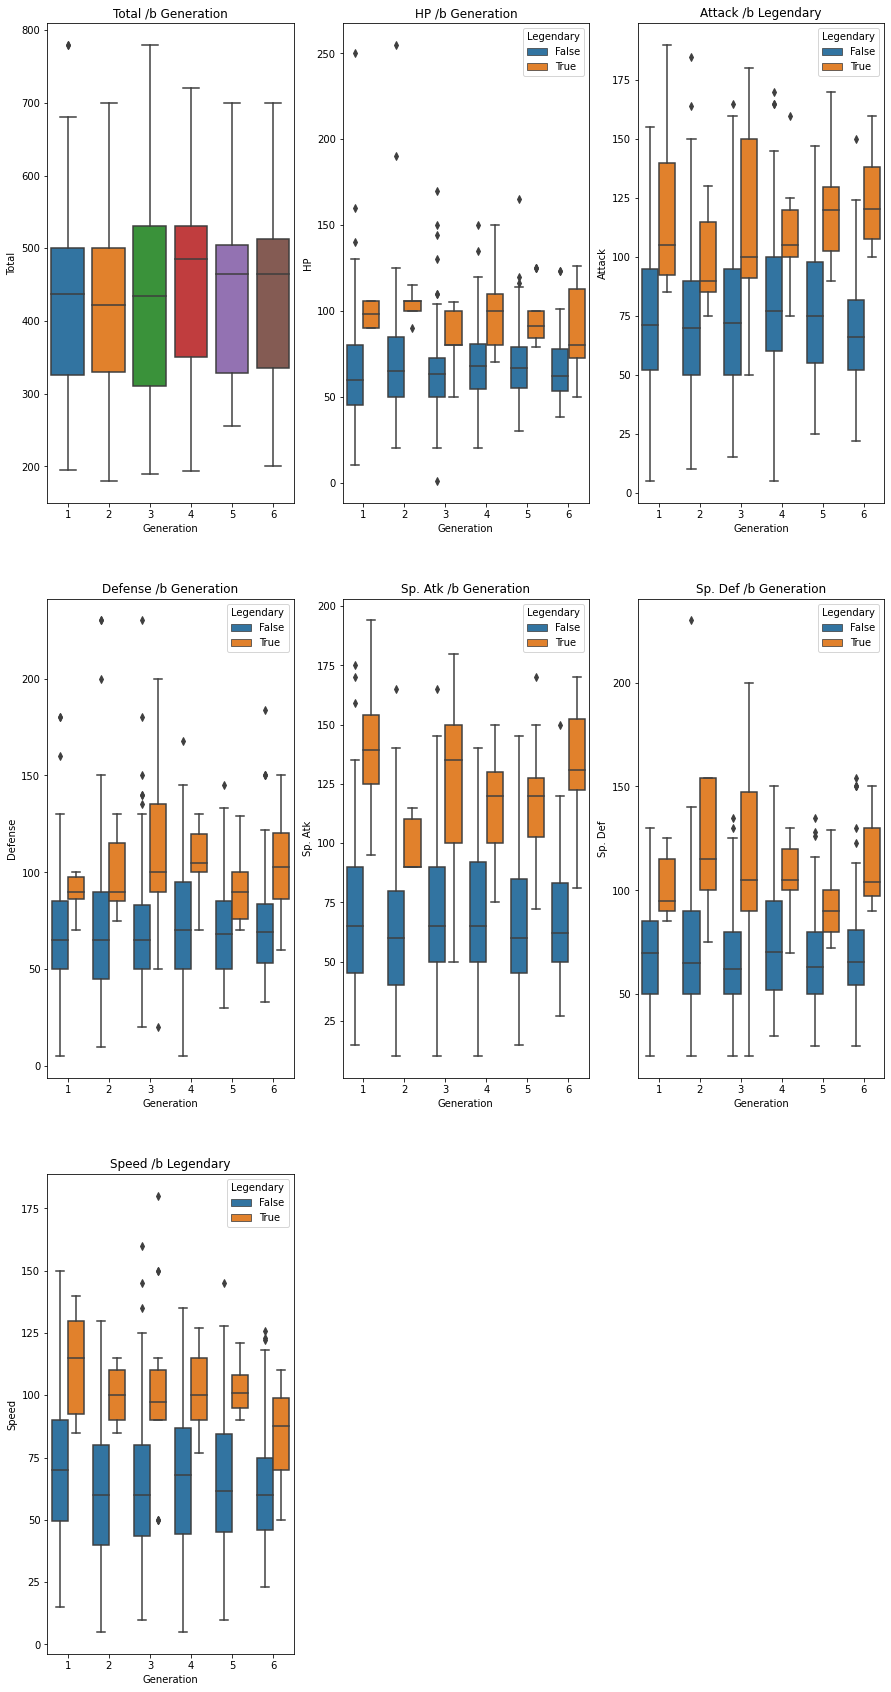

In [16]:
# let's look for some outliers

# plt.show()

fig = plt.figure(figsize=(15,30))
fig.add_subplot(3,3,1)
sns.boxplot(data=df, x='Generation', y='Total')
plt.title('Total /b Generation')

fig.add_subplot(3,3,2)
sns.boxplot(data=df, x='Generation', y='HP', hue='Legendary')
plt.title('HP /b Generation')

fig.add_subplot(3,3,3)
sns.boxplot(data=df, x='Generation', y='Attack', hue='Legendary')
plt.title('Attack /b Legendary')
fig.add_subplot(3,3,4)
sns.boxplot(data=df, x='Generation', y='Defense', hue='Legendary')
plt.title('Defense /b Generation')

fig.add_subplot(3,3,5)
sns.boxplot(data=df, x='Generation', y='Sp. Atk', hue='Legendary')
plt.title('Sp. Atk /b Generation')

fig.add_subplot(3,3,6)
sns.boxplot(data=df, x='Generation', y='Sp. Def', hue='Legendary')
plt.title('Sp. Def /b Generation')

fig.add_subplot(3,3,7)
sns.boxplot(data=df, x='Generation', y='Speed', hue='Legendary')
plt.title('Speed /b Legendary')

plt.show()

#### Many conclusions can be done from all the graphs:
1. An outlayer is the dot from Total/Generation boxplot
2. In the rest of the plots, there are lots of outlayers, but they are justified. Actually all of them have higher values and correspond to the TRUE Legendary Pokemon. Therefore we can say that all of them are 'justified'.
3. Also, in the Speed/Generation is an outlayer with speed = 50 but a legendary pokemon.

Let's look at those 2 outlayers:

In [17]:
df[(df['Generation'] == 1) & (df['Total'] > 650)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True


In [18]:
df[(df['Generation'] == 3) & (df['Speed'] == 50) & (df['Legendary'] == True)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
414,377,Regirock,Rock,NaN,580,80,100,200,50,100,50,3,True
415,378,Regice,Ice,NaN,580,80,50,100,100,200,50,3,True
416,379,Registeel,Steel,NaN,580,80,75,150,75,150,50,3,True


#### Ok, maybe I lost some time to analyse these data, but we can't really drop these 6 legendary 'outlayers'. Those, we will let them so

<AxesSubplot:>

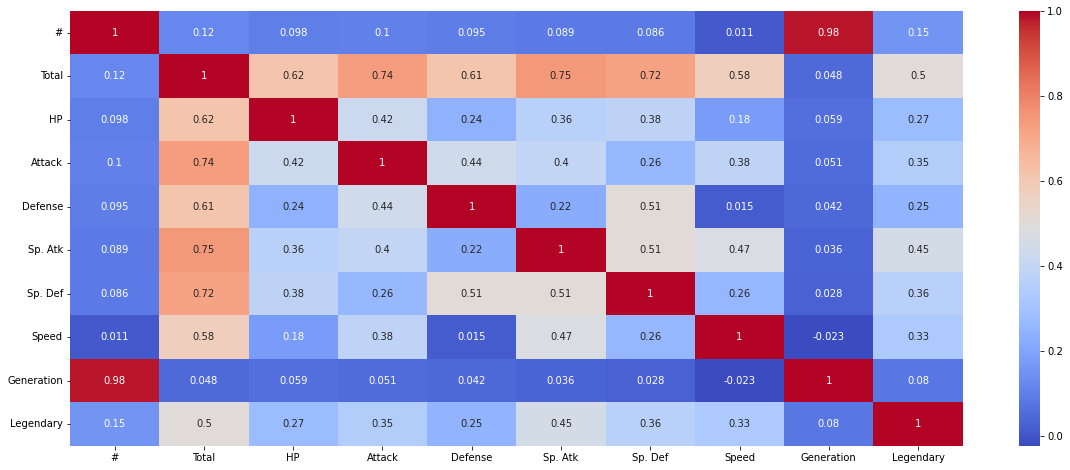

In [22]:
# correlation using heatmap
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

#### As it can be seen, aproximately all the graphs are left-skewd, which is ok, as only 8% of the pokemons are legendary ones, thus some big values are justified

## It's time for some nice plots that I found

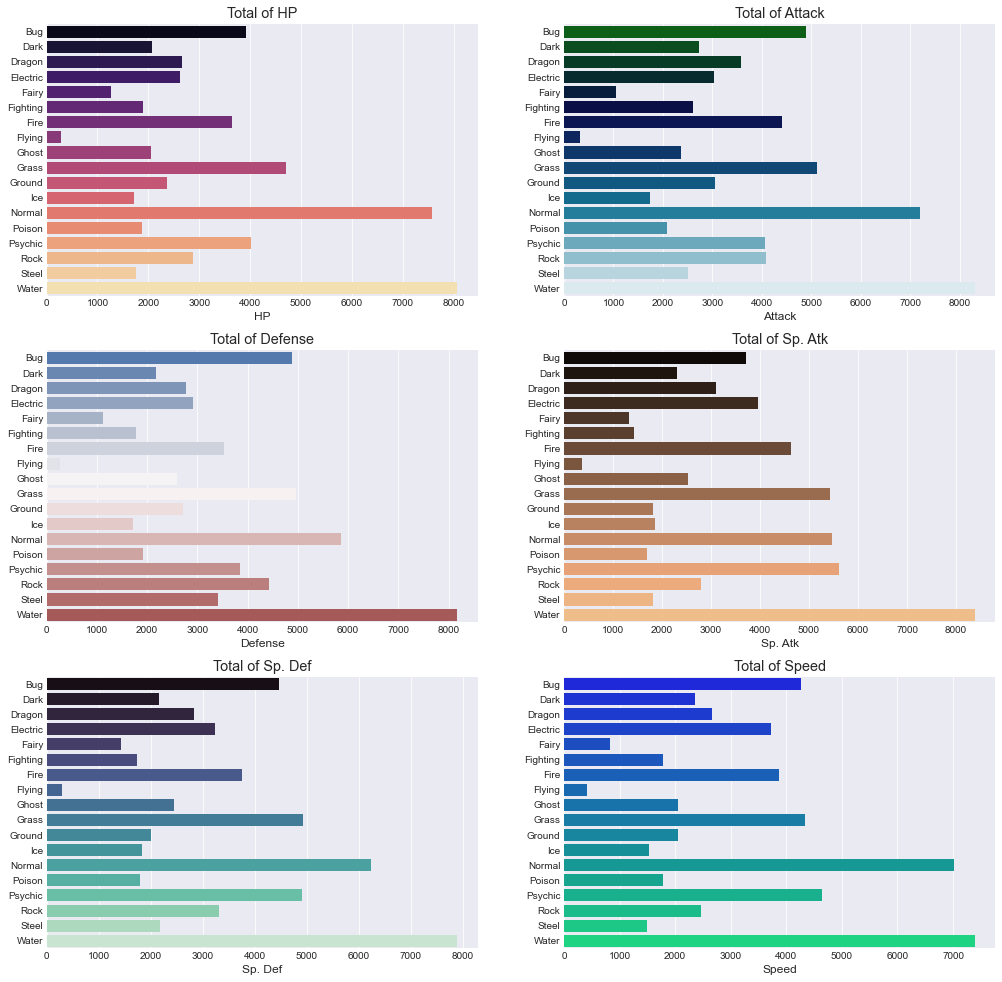

In [23]:
list_types=df['Type 1'].unique().tolist() # Convert the array of types into a list
list_types.sort() # Sorting the list of strings alphabetically

plt.style.use('ggplot')
plt.style.use('seaborn-darkgrid')

stats=df[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]
k=1
m=0
palette=['magma','ocean','vlag','copper','mako','winter']
plt.figure(figsize=(17,17))
for i in stats:
    plt.subplot(3,2,k)
    k=k+1
    sns.barplot(x=df.groupby('Type 1').sum()[i],y=list_types,palette=palette[m])
    m=m+1
    plt.title(str('Total of '+i))

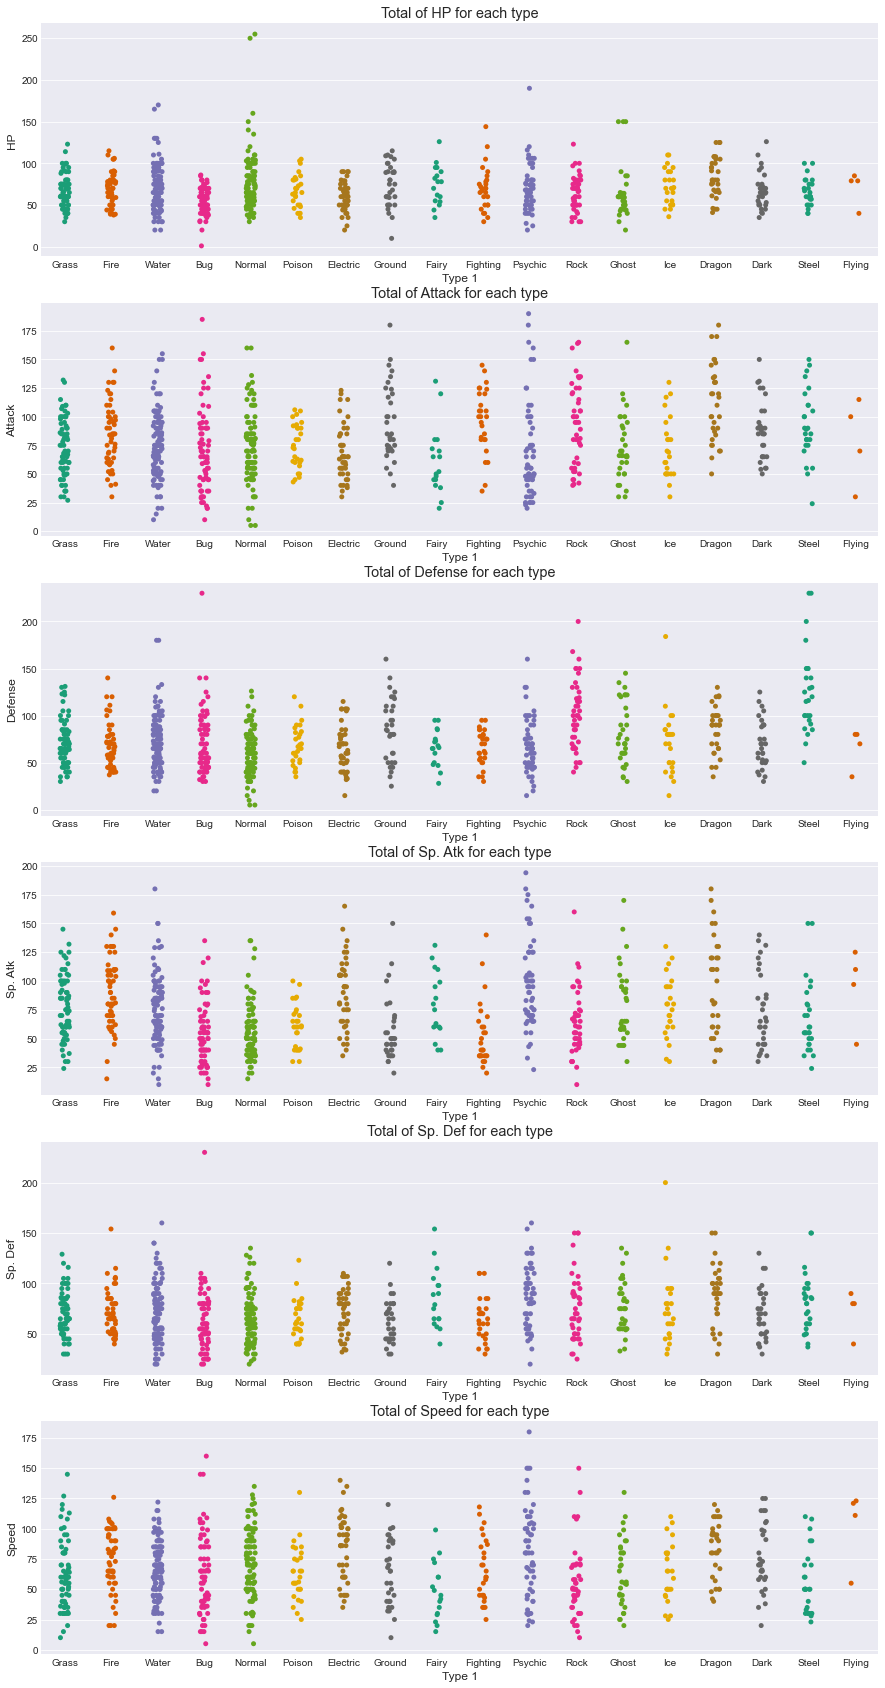

In [24]:
k=1;
m=0;
plt.figure(figsize=(15,30))
for i in stats:
    plt.subplot(6,1,k);
    k=k+1;
    sns.stripplot(x=df['Type 1'],y=df[i],palette='Dark2');
    plt.title(str('Total of ')+i + str(' for each type'))

C:\Users\Darinela\AppData\Local\Temp\ipykernel_18764\2835508959.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.barplot(x=df[df['Type 1']==i].sum().drop(['#','Name','Type 1','Generation','Legendary','Total']).values,
C:\Users\Darinela\AppData\Local\Temp\ipykernel_18764\2835508959.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  y=df[df['Type 1']==i].sum().drop(['#','Name','Type 1','Generation','Legendary','Total']).index,
C:\Users\Darinela\AppData\Local\Temp\ipykernel_18764\2835508959.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeErr

C:\Users\Darinela\AppData\Local\Temp\ipykernel_18764\2835508959.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.barplot(x=df[df['Type 1']==i].sum().drop(['#','Name','Type 1','Generation','Legendary','Total']).values,
C:\Users\Darinela\AppData\Local\Temp\ipykernel_18764\2835508959.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  y=df[df['Type 1']==i].sum().drop(['#','Name','Type 1','Generation','Legendary','Total']).index,
C:\Users\Darinela\AppData\Local\Temp\ipykernel_18764\2835508959.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeErr

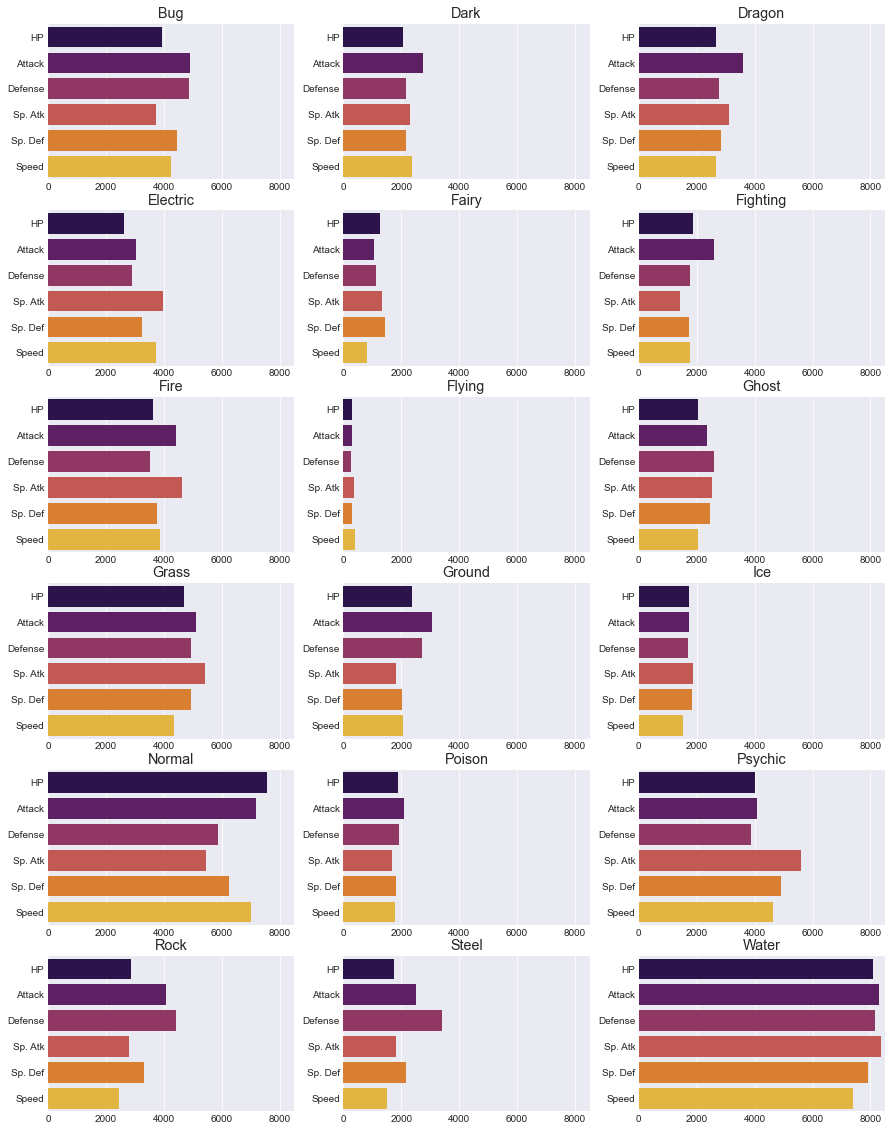

In [25]:
k=1;
plt.figure(figsize=(15,20))
for i in list_types:
    plt.subplot(6,3,k);
    k=k+1;
    sns.barplot(x=df[df['Type 1']==i].sum().drop(['#','Name','Type 1','Generation','Legendary','Total']).values,
                y=df[df['Type 1']==i].sum().drop(['#','Name','Type 1','Generation','Legendary','Total']).index,
                palette='inferno');
    plt.title(i)
    plt.xlim(0,8500)

## Drop columns

In [26]:
# Drop column non_numeric_col as it is now encoded
df1 = df.drop(['#', 'Name', 'Type 1', 'Type 2'],axis = 1)

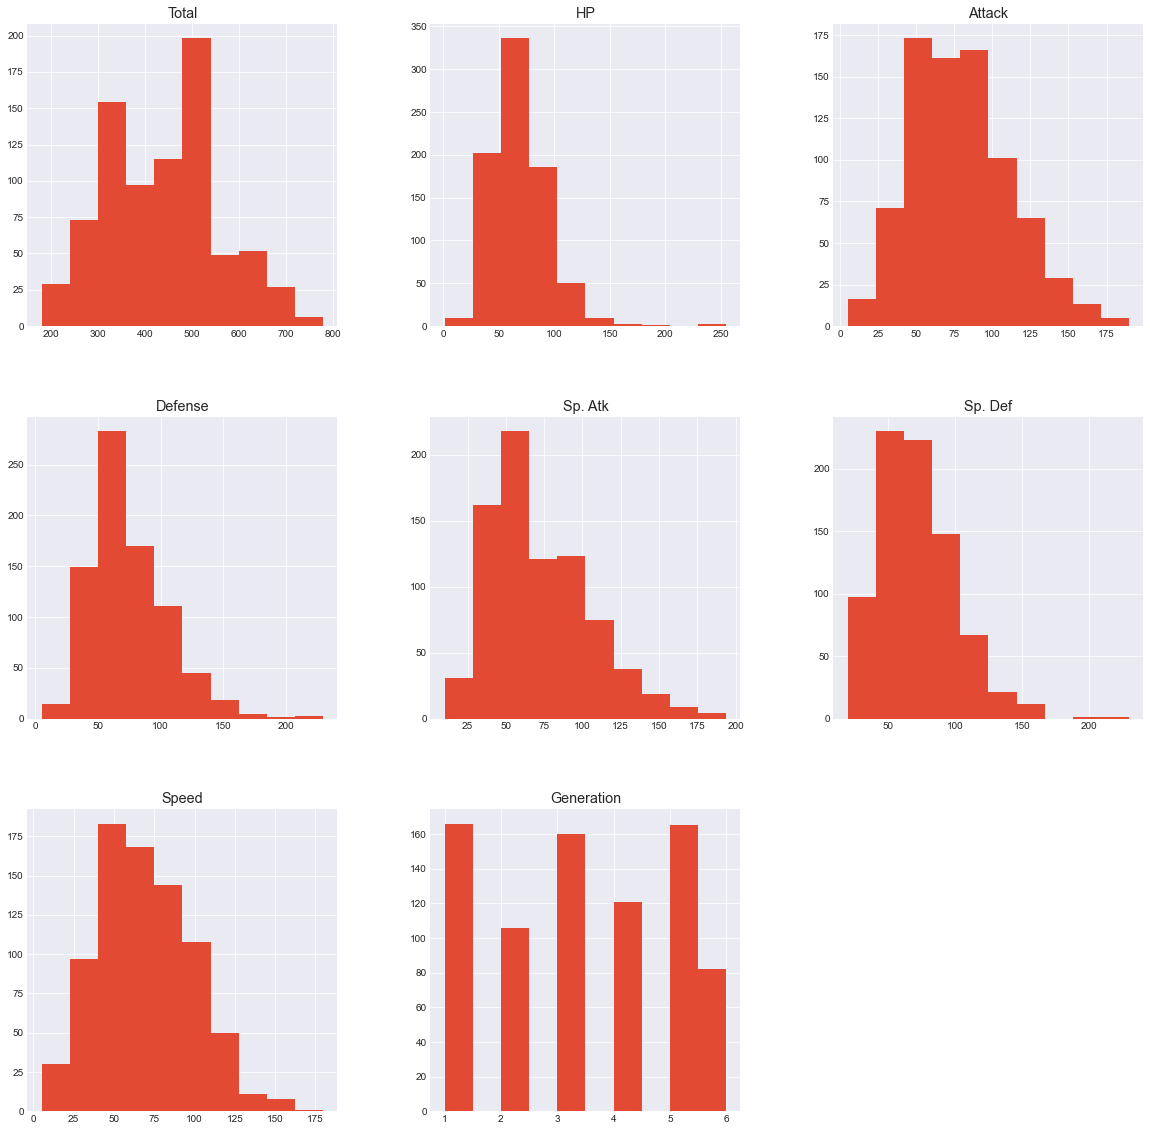

In [27]:
p = df1.hist(figsize = (20,20))

<AxesSubplot:>

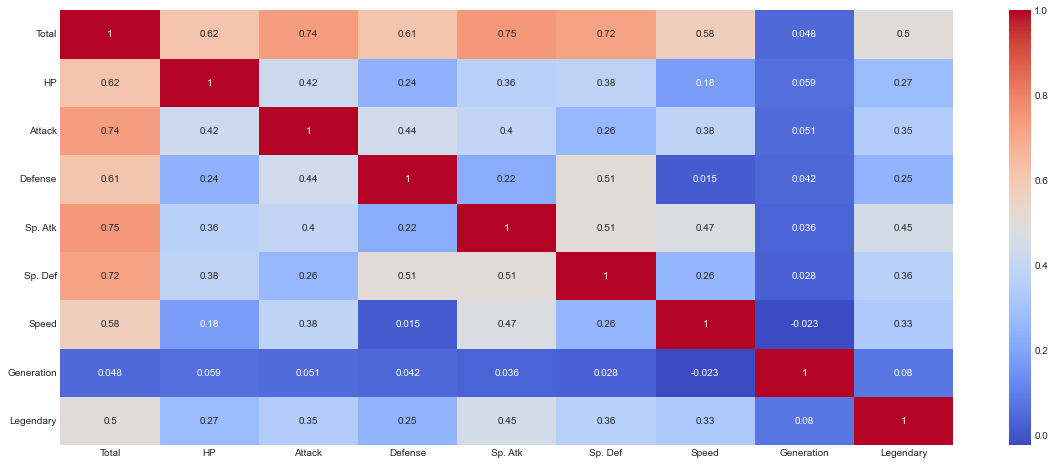

In [28]:
# correlation using heatmap
plt.figure(figsize=(20,8))
sns.heatmap(df1.corr(), annot = True, cmap='coolwarm')

## Feature Selection

In [29]:
X = df1.drop("Legendary", axis = 1)
y = df1["Legendary"]

In [30]:
def log_reg(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    score = lr.score(X_test, y_test)
    plot_confusion_matrix(lr, X_test, y_test)
    plt.show()
    return score 

c:\users\darinela\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\darinela\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


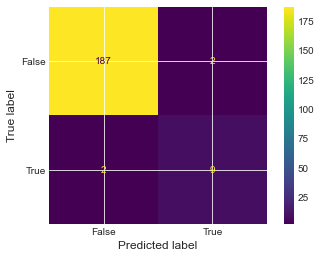

0.98

In [31]:
X = df1.drop("Legendary", axis = 1)
y = df1["Legendary"]
log_reg(X, y)

### p-value

In [32]:
from kydavra import PValueSelector
pv_s = PValueSelector()
selected_cols = pv_s.select(df1, 'Legendary')
selected_cols

['Total', 'HP', 'Defense', 'Sp. Atk', 'Speed', 'Generation']

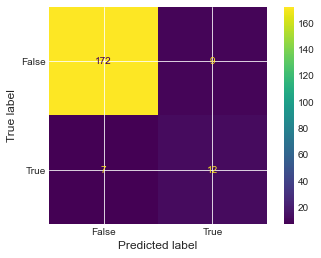

0.92

In [33]:
X = df1[selected_cols]
log_reg(X, y)

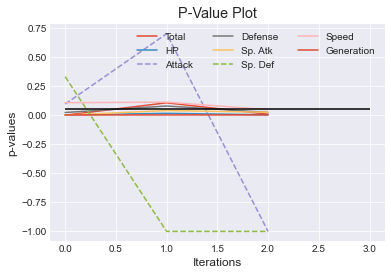

In [34]:
pv_s.plot_process()

### Genetic Algorithm

In [35]:
from kydavra import GeneticAlgorithmSelector
gen_sel = GeneticAlgorithmSelector()
logreg = LogisticRegression()
selected_columns = gen_sel.select(logreg, df1, 'Legendary')
selected_columns

['Total', 'Attack', 'Defense', 'Sp. Def', 'Generation']

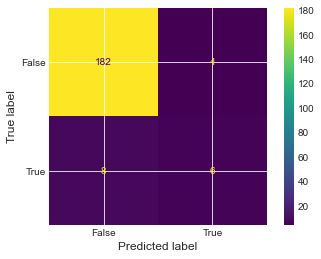

0.94

In [36]:
X = df1[selected_columns]
log_reg(X, y)

### Pearson Correlation

In [37]:
from kydavra import PearsonCorrelationSelector
pearson = PearsonCorrelationSelector()
selected_columns = pearson.select(df1, 'Legendary')
selected_columns

['Total']

In [38]:
pearson = PearsonCorrelationSelector(min_corr=0.30)
selected_columns = pearson.select(df1, 'Legendary')
selected_columns

['Total', 'Attack', 'Sp. Atk', 'Sp. Def', 'Speed']

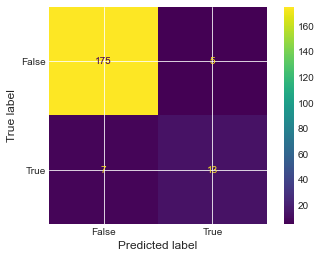

0.94

In [39]:
X = df1[selected_columns]
log_reg(X, y)

### LDA Reducer

In [40]:
from kydavra import LDAReducer
lda = LDAReducer()
selected_columns = lda.reduce(df1, 'Legendary')
selected_columns.columns

Index(['Generation', 'Legendary',
       'Attack_Defense_HP_Sp. Atk_Sp. Def_Speed_Total'],
      dtype='object')

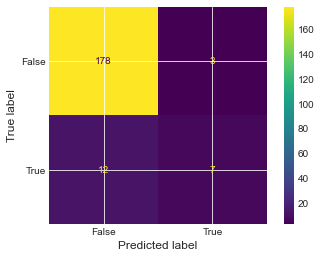

0.925

In [41]:
X = selected_columns.drop('Legendary', axis = 1)
log_reg(X, y)

### LASSO Selector

In [42]:
from kydavra import LassoSelector
selector = LassoSelector()
selected_cols = selector.select(df1, 'Legendary')
selected_cols

[]

In [43]:
# X = df1[selected_cols]
# log_reg(X, y)

### Point Biserial

In [44]:
from kydavra import PointBiserialCorrSelector
point_biseral = PointBiserialCorrSelector()
selected_cols = point_biseral.select(df1, 'Legendary')
selected_cols

['Total', 'Sp. Atk']

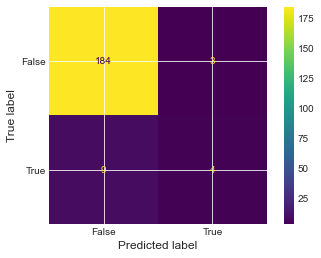

0.94

In [45]:
X = df1[selected_cols]
log_reg(X, y)

### Class Balancing

In [46]:
!pip install crucio

In [47]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df1, random_state=42)
# import numba
from crucio import SMOTE
smote = SMOTE()
balanced_df = smote.balance(df, 'Legendary')

ModuleNotFoundError: No module named 'crucio'

In [48]:
!pip install imbalanced-learn

     -------------------------------------- 199.1/199.1 KB 1.7 MB/s eta 0:00:00


In [50]:
# check version number
import imblearn
print(imblearn.__version__)

ModuleNotFoundError: No module named 'imblearn'